In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
data = {
    "delivery_time":[17.68, 12.50, 13.03, 15.88, 14.75, 19.11, 9, 18.83, 80.24, 22.50,
                    41.33, 22, 14.50, 20.75, 25, 30, 16.35, 20, 10.50, 36.10],
    "number_of_cases":[7, 3, 3, 4, 6, 7, 2, 7, 30, 5, 16, 10, 4, 6, 9, 10, 6, 7, 3, 17],
    "distance":[560, 220, 340, 80, 150, 330, 110, 210, 1460, 605, 688, 215, 255, 462, 448,
               776, 200, 132, 36, 770]
}
print(data.items())
df = pd.DataFrame(data)
df.head()

y = df['delivery_time']
X = df[['number_of_cases','distance']]
X = sm.add_constant(X)
fitted_model = sm.OLS(y,X).fit()
fitted_model.summary()


dict_items([('delivery_time', [17.68, 12.5, 13.03, 15.88, 14.75, 19.11, 9, 18.83, 80.24, 22.5, 41.33, 22, 14.5, 20.75, 25, 30, 16.35, 20, 10.5, 36.1]), ('number_of_cases', [7, 3, 3, 4, 6, 7, 2, 7, 30, 5, 16, 10, 4, 6, 9, 10, 6, 7, 3, 17]), ('distance', [560, 220, 340, 80, 150, 330, 110, 210, 1460, 605, 688, 215, 255, 462, 448, 776, 200, 132, 36, 770])])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     260.5
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.77e-13
Time:                        11:52:25   Log-Likelihood:                -48.452
No. Observations:                  20   AIC:                             102.9
Df Residuals:                      17   BIC:                             105.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4707      1.082      3.207      0.005       1.187       5.754
number_of_cases     1.8188      0.212      8.580      0.000       1.372       2.266
distance            0.0119      0.004      2.929      0.009       0.003       0.021
==============================================================================
Omnibus:                        6.576   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.049
Skew:                          -0.878   Prob(JB):                        0.132
Kurtosis:                       4.332   Cond. No.                         853.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

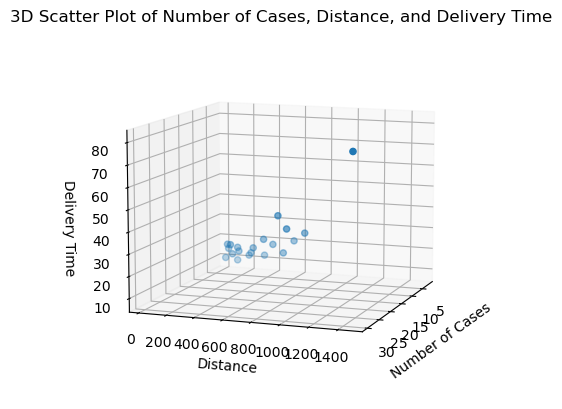

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df['number_of_cases'], df['distance'], df['delivery_time']) 

ax.set_xlabel('Number of Cases') 
ax.set_ylabel('Distance') 
ax.set_zlabel('Delivery Time') 
ax.set_title('3D Scatter Plot of Number of Cases, Distance, and Delivery Time') 
ax.view_init(elev=10, azim=20)
plt.show()

Text(0.5, 1.0, 'Distance vs Delivery Time')

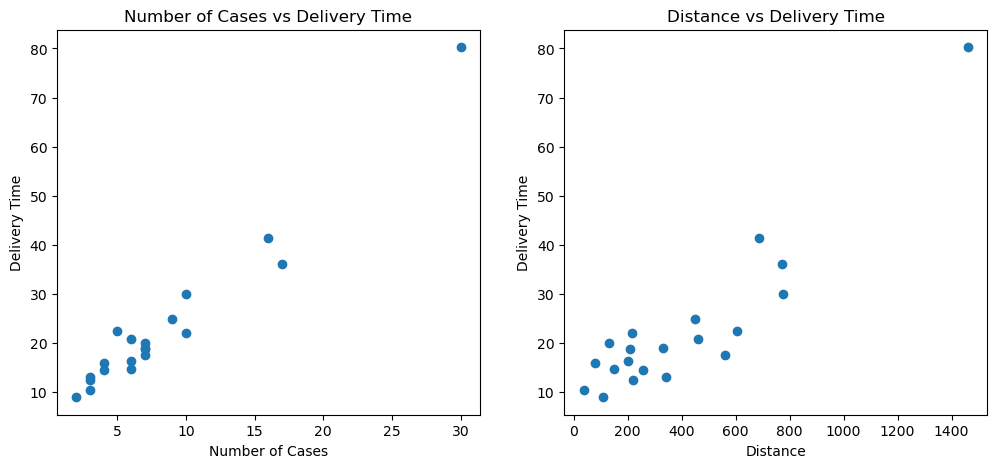

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(df['number_of_cases'], df['delivery_time']) 
axs[0].set_xlabel('Number of Cases') 
axs[0].set_ylabel('Delivery Time') 
axs[0].set_title('Number of Cases vs Delivery Time')
axs[1].scatter(df['distance'], df['delivery_time']) 
axs[1].set_xlabel('Distance') 
axs[1].set_ylabel('Delivery Time') 
axs[1].set_title('Distance vs Delivery Time')

In [4]:
ols_estimate = fitted_model.params
print("OLS Estimates:\n", ols_estimate)
rss = np.sum(fitted_model.resid**2)
sigma_squared = rss/(len(y)-len(X.columns))
var_cov_matrix = sigma_squared * np.linalg.inv(np.dot(X.T, X)) 
print("Variance-Covariance Matrix:\n", var_cov_matrix) 
std_errors = np.sqrt(np.diag(var_cov_matrix)) 
print("Standard Errors:\n", std_errors)
mean_estimate = np.mean(y) 
print("\nMean Estimate:\n", mean_estimate)

OLS Estimates:
 const              3.470719
number_of_cases    1.818826
distance           0.011928
dtype: float64
Variance-Covariance Matrix:
 [[ 1.17133236e+00 -6.15959558e-02 -5.82992735e-04]
 [-6.15959558e-02  4.49378412e-02 -7.51585829e-04]
 [-5.82992735e-04 -7.51585829e-04  1.65796892e-05]]
Standard Errors:
 [1.08228109 0.21198547 0.00407182]

Mean Estimate:
 23.002500000000005


In [5]:
std_errors = fitted_model.bse 
print("Standard Errors:\n", std_errors)
sample_variance = np.var(y)
mean_variance = sample_variance / len(y) 
print("Variance of Mean Estimate:", mean_variance)

Standard Errors:
 const              1.082281
number_of_cases    0.211985
distance           0.004072
dtype: float64
Variance of Mean Estimate: 11.775706437499998


In [6]:
intercept = 3.5 
Slope1 = 1.6
Slope2 = 0.01
y_predict = intercept + Slope1*df['number_of_cases'] + Slope2*df['distance']
residuals = df['delivery_time'] - y_predict
rss = np.sum(residuals**2)
sigma1_squared = rss/(len(y)-len(X.columns))
var_cov_matrix = sigma1_squared * np.linalg.inv(np.dot(X.T, X))
std_errors = np.sqrt(np.diag(var_cov_matrix)) 
print('\nstd errors:\n',std_errors)


std errors:
 [1.66731271 0.32657512 0.00627285]
